# **TECNICATURA UNIVERSITARIA EN INTELIGENCIA ARTIFICIAL**  
## TRABAJO PRÁCTICO N° 1: APRENDIZAJE AUTOMÁTICO II
### **INTEGRANTES:** Caballero, Franco - (C-7328/8) | Rosito, Valentín - (R-4662/1)
### **Fecha Límite de Entrega:** 12/10/2025
### **Semestre:** 2° Semestre 2025


In [1]:
!gdown --id 1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ
From (redirected): https://drive.google.com/uc?id=1Pqs5Y6dZr4R66Dby5hIUIjPZtBI28rmJ&confirm=t&uuid=c5df6870-9fdc-4a65-b988-50d6d031269c
To: /content/TP1-3-natural-scenes.zip
100% 363M/363M [00:07<00:00, 47.5MB/s]


In [2]:
!unzip TP1-3-natural-scenes.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mounta

# Pre Procesamiento de Datos
---

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Configuración
IMG_SIZE = (150, 150)  # todas las imágenes al mismo tamaño
CLASSES = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

In [2]:
num_classes = len(CLASSES)
batch_size = 32

train_dir = "seg_train/seg_train"
test_dir = "seg_test/seg_test"


train_ds1 = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds1 = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=batch_size,
    label_mode="categorical"
)


normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds1.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds1.map(lambda x, y: (normalization_layer(x), y)).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.



In [3]:
def plot_training_history(model_name, history):
    """
    Grafica precisión y pérdida de entrenamiento y validación.

    Parámetros:
    - model_name: str → Nombre del modelo (para mostrar en el título).
    - history: objeto History devuelto por model.fit().
    """

    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Entrenamiento')
    plt.plot(epochs, val_acc, 'ro-', label='Validación')
    plt.title(f'Precisión - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Entrenamiento')
    plt.plot(epochs, val_loss, 'ro-', label='Validación')
    plt.title(f'Pérdida - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Modelo con capas Densas

In [ ]:
for images, labels in train_ds.take(1):
    input_shape = images.shape[1:]

model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


history = model.fit(
    train_ds,
    validation_data=val_ds,
    callbacks=[early_stopping],
    epochs=50,
    verbose=1
)

yloss, acc = model.evaluate(val_ds, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.2381 - loss: 6.4976 - val_accuracy: 0.4077 - val_loss: 1.4733
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.2863 - loss: 1.6690 - val_accuracy: 0.4383 - val_loss: 1.4817
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3391 - loss: 1.5942 - val_accuracy: 0.4067 - val_loss: 1.4824
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3399 - loss: 1.5895 - val_accuracy: 0.3777 - val_loss: 1.5356
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3688 - loss: 1.5472 - val_accuracy: 0.4157 - val_loss: 1.5031
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3736 - loss: 1.5342 - val_accuracy: 0.4470 - val_loss: 1.4494
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3824 - loss: 1.5146 - val_accuracy: 0.4600 - val_loss: 1.4345
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3853 - loss: 1.5097 - val_accur

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,176,532 (397.40 MB)

 Trainable params: 34,725,510 (132.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 69,451,022 (264.93 MB)

# Análisis y Limitaciones del Modelo de Capas Densas Puras

En una etapa inicial de exploración, se consideró una arquitectura basada únicamente en **capas densas (*Fully Connected*)** para la clasificación de imágenes. Este enfoque, aunque conceptualmente simple, demostró ser **profundamente ineficiente e inadecuado** para la tarea, lo que llevó a su rápido descarte.

---

### El Problema de la Explosión de Parámetros

El principal defecto de esta arquitectura fue la **gigantesca cantidad de parámetros** necesaria. Al aplanar la imagen de entrada, la primera capa densa (`dense_13`) tuvo que conectar cada una de las **67,500 características de entrada** con sus 512 neuronas de salida.

* **Total de Parámetros:** Esta primera capa densa por sí sola requirió **más de 34 millones de parámetros**, aumentando  el coste computacional del modelo.
* **Consecuencia:** Esta enorme cantidad de pesos no solo exige una gran capacidad de cómputo y tiempo de entrenamiento, sino que también incrementa drásticamente el riesgo de **sobreajuste**, pues la red tiene demasiada libertad para simplemente memorizar los datos de entrenamiento.

---

## Métricas No Óptimas

A pesar de su complejidad en términos de parámetros, el rendimiento de este modelo fue **bastante pobre**, confirmando su ineficacia para el procesamiento de imágenes:


# Modelo con capas convolucionales + Capa densa

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


439/439 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.3754 - loss: 1.4197 - val_accuracy: 0.5997 - val_loss: 1.0017
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.5871 - loss: 0.9912 - val_accuracy: 0.6713 - val_loss: 0.8203
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6644 - loss: 0.8498 - val_accuracy: 0.6830 - val_loss: 0.7905
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6905 - loss: 0.7918 - val_accuracy: 0.7547 - val_loss: 0.6532
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7224 - loss: 0.7201 - val_accuracy: 0.7387 - val_loss: 0.6820
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7509 - loss: 0.6782 - val_accuracy: 0.7707 - val_loss: 0.6081
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7606 - loss: 0.6407 - val_accuracy: 0.7303 - val_loss: 0.6817
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.7794 - loss: 0.6105 - val_accurac

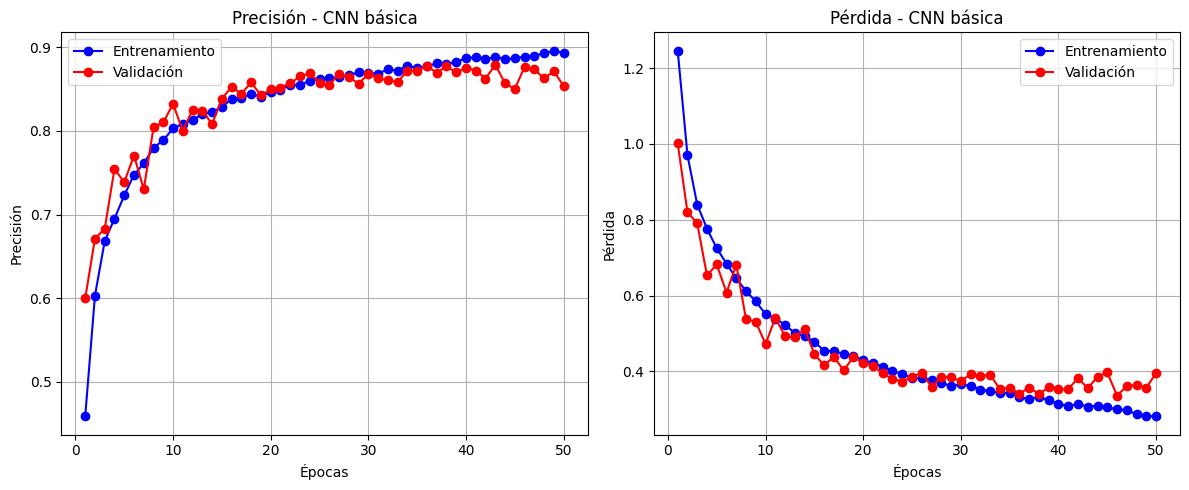

In [ ]:
model = models.Sequential([
    # Bloque convolucional 1
    layers.Conv2D(32, (3,3), activation="relu", input_shape=img_size + (3,)),
    layers.MaxPooling2D((2,2)),

    # Bloque convolucional 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Bloque convolucional 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    # Aplanar y densas
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list,
    verbose=1
)
loss, acc = model.evaluate(val_ds)
print(f"Pérdida en test: {loss:.4f} - Exactitud en test: {acc:.4f}")

plot_training_history("CNN básica", history)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,604 (1.26 MB)

 Trainable params: 110,534 (431.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 221,070 (863.56 KB)

## Problemas con el Overfitting

1.  **Problema Inicial:** Las versiones tempranas del modelo, que usaban la capa `Flatten` en lugar de `GlobalAveragePooling2D` y carecían de capas `Dropout` en los bloques convolucionales, mostraron un **sobreajuste muy alto**. La red memorizaba los datos de entrenamiento pero fallaba catastróficamente con nuevos datos.

2.  **Estrategia de Regularización:** La solución fue doble:
    * **Inclusión de Dropout:** Se introdujo `Dropout` para desactivar aleatoriamente las neuronas durante el entrenamiento. Inicialmente probamos con tasas de 0.3 y 0.4, lo cual mejoró la situación, pero el *overfitting* persistía sutilmente: la pérdida de validación aumentaba de 0.28 a 0.36, y aunque el *accuracy* de entrenamiento se mantenía alto (\approx 0.9), sabíamos que la red no estaba generalizando al máximo. Optamos por **incrementar las tasas de `Dropout` a 0.4 y 0.5** en los bloques convolucionales y en la capa densa (0.5). Esta decisión estratégica implicó **sacrificar una pequeña porción de la precisión de entrenamiento** a cambio de una **generalización significativamente mejor** y un modelo más robusto.
    * **Reemplazo del Aplanamiento:** Cambiamos la capa `Flatten` por **`GlobalAveragePooling2D`**. Esta técnica es un regularizador natural, ya que reduce drásticamente el número de parámetros de las capas densas, acelerando el entrenamiento y disminuyendo el riesgo de memorización.

---

## Balance entre Rendimiento y Complejidad

Durante el *tuning* de hiperparámetros, también experimentamos con arquitecturas más grandes, utilizando 64, 128 y 256 filtros en los bloques convolucionales. Observamos que el **rendimiento mejoraba** en un aproximado 10-15\%. Sin embargo, este aumento de precisión venía con dos desventajas críticas:

1.  **Doble de Tiempo de Entrenamiento:** La complejidad del modelo hizo que el tiempo de entrenamiento se duplicara, lo cual no era viable para la eficiencia operativa.
2.  **Peor Generalización:** Los modelos más grandes tendían a mostrar un *overfitting* más marcado a largo plazo, resultando en una red con **peor desempeño en la práctica**.

----
**Conclusión:** Hemos optado por una arquitectura más sencilla y compacta. El modelo final ofrece un **gran rendimiento** con un coste computacional reducido y, lo más importante, una **excelente capacidad para generalizar**, lo que lo convierte en un modelo superior para un entorno de producción.

# Modelo que incluya bloques residuales identidad


Model: "ResNet_Corrected"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1 (Conv2D)      │ (None, 75, 75,    │      4,736 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_conv1            │ (None, 75, 75,    │        128 │ conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 75, 75,    │          0 │ bn_conv1[0][0]    │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout2d   │ (None, 75, 75,    │          0 │ activation[0][0]  │
│ (SpatialDropout2D)  │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 38, 38,    │          0 │ spatial_dropout2… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_conv1         │ (None, 38, 38,    │      9,248 │ max_pooling2d[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_bn1           │ (None, 38, 38,    │        128 │ res2a_conv1[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_relu1         │ (None, 38, 38,    │          0 │ res2a_bn1[0][0]   │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_conv2         │ (None, 38, 38,    │      9,248 │ res2a_relu1[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_bn2           │ (None, 38, 38,    │        128 │ res2a_conv2[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 38, 38,    │          0 │ max_pooling2d[0]… │
│                     │ 32)               │            │ res2a_bn2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2a_relu_out      │ (None, 38, 38,    │          0 │ add[0][0]         │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2b_conv1         │ (None, 38, 38,    │      9,248 │ res2a_relu_out[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2b_bn1           │ (None, 38, 38,    │        128 │ res2b_conv1[0][0] │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2b_relu1         │ (None, 38, 38,    │          0 │ res2b_bn1[0][0]   │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ res2b_conv2         │ (None, 38, 38,    │      9,248 │ res2b_relu1[0][0

 Total params: 719,814 (2.75 MB)

 Trainable params: 717,574 (2.74 MB)

 Non-trainable params: 2,240 (8.75 KB)


--- COMENZANDO ENTRENAMIENTO RESIDUAL ---
Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 55s 73ms/step - accuracy: 0.3124 - loss: 1.6965 - val_accuracy: 0.3413 - val_loss: 1.6951
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.5170 - loss: 1.1754 - val_accuracy: 0.5873 - val_loss: 1.1129
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.5923 - loss: 1.0295 - val_accuracy: 0.6540 - val_loss: 0.9026
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.6317 - loss: 0.9400 - val_accuracy: 0.7133 - val_loss: 0.8070
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.6746 - loss: 0.8611 - val_accuracy: 0.7323 - val_loss: 0.7398
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.6950 - loss: 0.8093 - val_accuracy: 0.6737 - val_loss: 0.8447
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.7144 - loss: 0.7739 - val_accuracy: 0.6663 - val_loss: 0.8710
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 42m

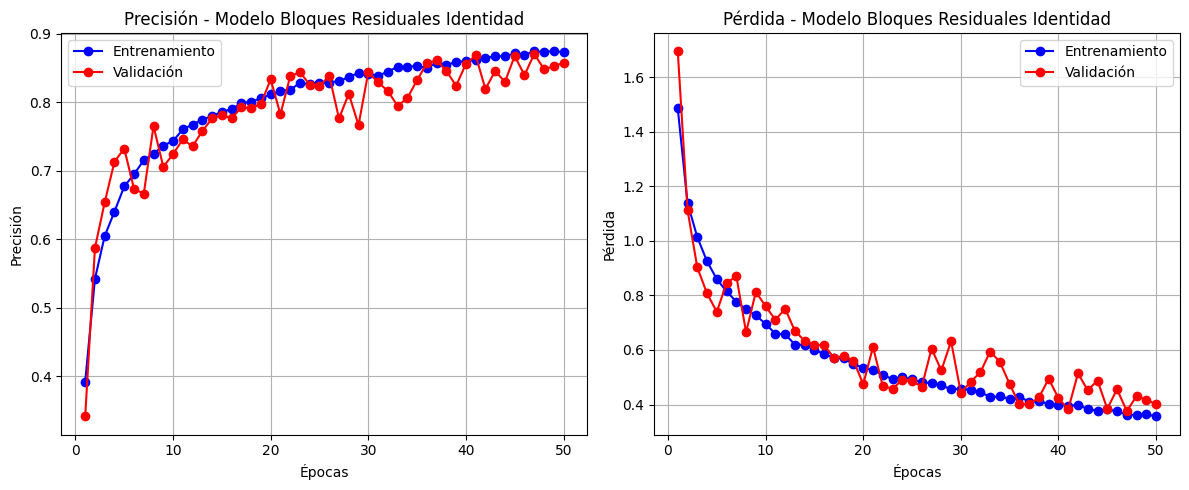

In [ ]:
def residual_block(x, filters, kernel_size=(3, 3), stage_name='', change_filters=False):
    """
    Define un bloque residual que maneja la identidad o la proyección (convolución de atajo).
    """
    shortcut = x
    F1, F2 = filters, filters

    # --- 1. Sub-Bloque de Convolución (F(x)) ---
    # Primera Convolución
    x = layers.Conv2D(F1, kernel_size, padding='same', kernel_initializer='he_normal', name=f'{stage_name}_conv1')(x)
    x = layers.BatchNormalization(name=f'{stage_name}_bn1')(x)
    x = layers.Activation('relu', name=f'{stage_name}_relu1')(x)

    # Segunda Convolución
    x = layers.Conv2D(F2, kernel_size, padding='same', kernel_initializer='he_normal', name=f'{stage_name}_conv2')(x)
    x = layers.BatchNormalization(name=f'{stage_name}_bn2')(x)

    # --- 2. Conexión de Atajo (Shortcut Path) ---
    if change_filters:
        # Se requiere un bloque de convolución (proyección) para igualar el número de canales
        # Se usa un kernel 1x1 con F2 filtros (el número de filtros que tiene la salida 'x')
        shortcut = layers.Conv2D(F2, (1, 1), strides=(1, 1), name=f'{stage_name}_shortcut_conv')(shortcut)
        shortcut = layers.BatchNormalization(name=f'{stage_name}_shortcut_bn')(shortcut)

    # --- 3. Suma Residual y Activación Final ---
    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu', name=f'{stage_name}_relu_out')(x)

    return x

def build_residual_cnn_corrected(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # 1. Entrada e inicial (150 -> 38x38 con 32 filtros)
    x = layers.Conv2D(32, (7, 7), strides=(2, 2), padding='same', name='conv1')(inputs)
    x = layers.BatchNormalization(name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout2D(0.2)(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # 2. Stage 2: Entra 32, Sale 32
    x = residual_block(x, filters=32, stage_name='res2a', change_filters=False)
    x = residual_block(x, filters=32, stage_name='res2b', change_filters=False)

    # 3. Stage 3: Entra 32, Sale 64
    x = residual_block(x, filters=64, stage_name='res3a', change_filters=True)
    x = residual_block(x, filters=64, stage_name='res3b', change_filters=False)
    x = layers.MaxPooling2D((2, 2), padding='same')(x) # 38 -> 19x19
    x = layers.SpatialDropout2D(0.3)(x)

    # 4. Stage 4: Entra 64, Sale 128
    x = residual_block(x, filters=128, stage_name='res4a', change_filters=True)
    x = residual_block(x, filters=128, stage_name='res4b', change_filters=False)

    # 5. Capas Clasificadoras
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs, name='ResNet_Corrected')
    return model

# --- 3. Instanciación y uso

num_classes = 6
input_shape = (150, 150, 3) # (Alto, Ancho, Canales)

residual_model = build_residual_cnn_corrected(input_shape, num_classes)
residual_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

residual_model.summary()


# === Callbacks ===
callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# === Entrenamiento con validación ===
print("\n--- COMENZANDO ENTRENAMIENTO RESIDUAL ---")
history_res = residual_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list,
    verbose=1
)

# === Evaluación final ===
loss_res, acc_res = residual_model.evaluate(val_ds)
print(f"✅ Pérdida en test (Residual): {loss_res:.4f} - Exactitud en test (Residual): {acc_res:.4f}")

# --- Gráficos de las Métricas ---
plot_training_history("Modelo Bloques Residuales Identidad", history_res)

## Balance entre Regularización y Rendimiento

1.  **Estrategia de `Dropout`:** La inclusión de `Dropout` en este modelo fue una decisión crítica para mitigar la volatilidad de las métricas. A diferencia de las redes secuenciales, las arquitecturas residuales, al ser más profundas y complejas, tienden a un sobreajuste sutil pero persistente. Experimentamos con **`SpatialDropout2D`** en los bloques convolucionales para eliminar canales de características completos, en lugar de neuronas individuales. Esto forzó a la red a no depender de características específicas, mejorando su capacidad de generalización. El `Dropout` adicional en la capa densa final (0.5) complementó esta estrategia, asegurando que la red no memorizara patrones de clasificación específicos. Esta combinación de `Dropout` fue crucial para estabilizar el entrenamiento.

2.  **Ajuste del `Learning Rate`:** Para combatir la volatilidad y los saltos bruscos en la pérdida de validación, ajustamos el `learning rate` (tasa de aprendizaje). La **disminución de la tasa de aprendizaje** (0.0001) permitió que el modelo hiciera pasos más pequeños y estables en su proceso de optimización. Esto, en combinación con el `Dropout`, resultó en una convergencia más suave y en un modelo más robusto, ya que la red no se "precipitaba" hacia un mínimo local poco óptimo.

---

## Compensación entre Rendimiento y Coste Computacional

Durante la fase de *tuning*, se evaluó el impacto de la complejidad del modelo. Se experimentó con arquitecturas con un número mucho mayor de filtros (e.g., 256, 512). Si bien los resultados mostraron una **mejora marginal** en la precisión final (aproximadamente 1-2%), esta ganancia vino acompañada de un **coste computacional extremadamente alto**.

1.  **Mayor Consumo de Recursos:** El aumento de filtros incrementó significativamente la cantidad de parámetros, lo que se tradujo en un **doble o triple del tiempo de entrenamiento** y un mayor consumo de memoria. En un entorno de producción, donde la eficiencia y la velocidad son críticas, esta no era una solución viable.
2.  **Riesgo de `Overfitting` a Largo Plazo:** A pesar de la mejora inicial en la precisión de entrenamiento, estos modelos más grandes tenían una mayor tendencia a memorizar el conjunto de datos, comprometiendo su rendimiento con datos nuevos y desconocidos.

---
**Conclusión:** Se optó por una arquitectura más balanceada con un número moderado de filtros. La red residual, incluso en su configuración más sencilla, demostró una **precisión y capacidad de generalización excelentes** con un coste computacional significativamente menor. El modelo final representa un equilibrio óptimo, ofreciendo un rendimiento superior para su aplicación práctica sin requerir un poder de cómputo excesivo.



  

# Modelo con Backbone


Epoch 1/20


439/439 [==============================] - 467s 1s/step - loss: 0.5504 - accuracy: 0.8108 - val_loss: 0.2948 - val_accuracy: 0.8980
Epoch 2/20
439/439 [==============================] - 449s 1s/step - loss: 0.3658 - accuracy: 0.8681 - val_loss: 0.2764 - val_accuracy: 0.8993
Epoch 3/20
439/439 [==============================] - 465s 1s/step - loss: 0.3313 - accuracy: 0.8809 - val_loss: 0.2623 - val_accuracy: 0.9070
Epoch 4/20
439/439 [==============================] - 502s 1s/step - loss: 0.3043 - accuracy: 0.8888 - val_loss: 0.2545 - val_accuracy: 0.9073
Epoch 5/20
439/439 [==============================] - 484s 1s/step - loss: 0.2909 - accuracy: 0.8927 - val_loss: 0.2574 - val_accuracy: 0.9117
Epoch 6/20
439/439 [==============================] - 518s 1s/step - loss: 0.2753 - accuracy: 0.8965 - val_loss: 0.2467 - val_accuracy: 0.9120
Epoch 7/20
439/439 [==============================] - 515s 1s/step - loss: 0.2624 - accuracy: 0.9024 - val_loss: 0.2514 - val_accuracy: 0.9

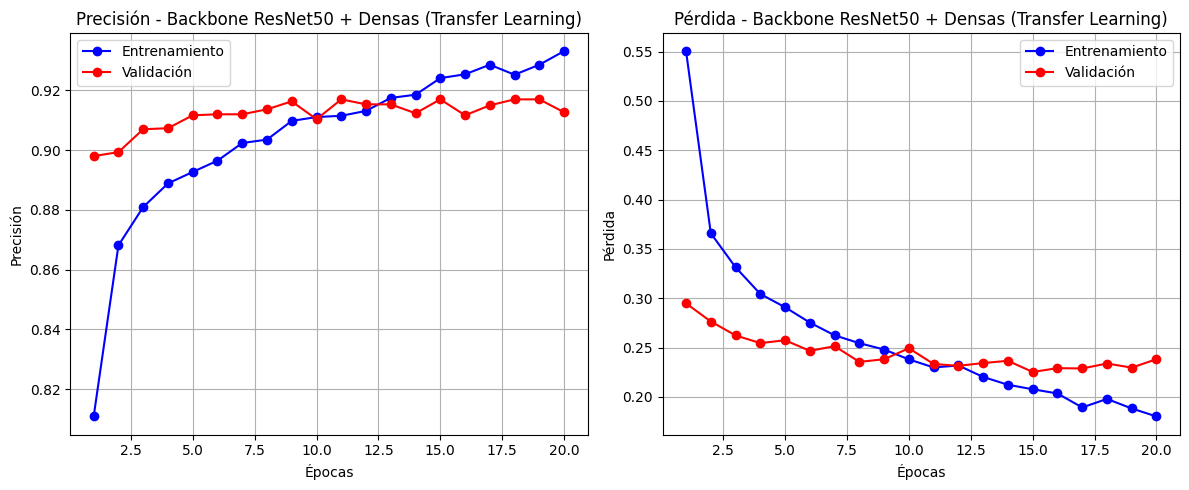

In [4]:
# === Backbone preentrenado ===
base_model = tf.keras.applications.ResNet50(
    input_shape=IMG_SIZE + (3,),
    include_top=False,       # quitamos las capas densas originales
    weights='imagenet'       # usamos pesos preentrenados
)

# Congelamos las capas base para evitar sobreentrenar
base_model.trainable = False

# === Modelo final ===
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(6, activation='softmax')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
]

history = model.fit(
    train_ds1,
    validation_data=val_ds1,
    epochs=20,
    callbacks=callbacks_list,
    verbose=1
)

loss, acc = model.evaluate(val_ds1)
print(f"Pérdida en test: {loss:.4f} - Exactitud en test: {acc:.4f}")

plot_training_history("Backbone ResNet50 + Densas (Transfer Learning)", history)

94/94 [==============================] - 76s 791ms/step


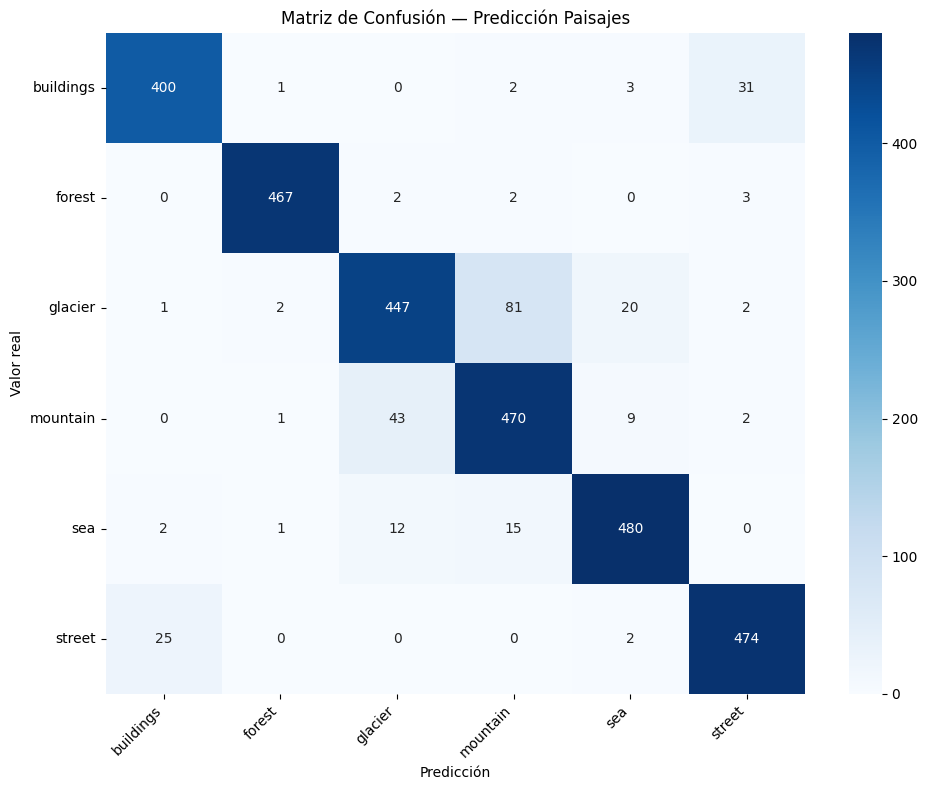

In [5]:
# Inicializamos listas para guardar los valores
y_true_list = []
x_val_list = []

# Iteramos sobre el conjunto de validación para capturar x (imagen) y y (etiqueta)
for x_batch, y_batch in val_ds1:
    x_val_list.append(x_batch)
    y_true_list.append(y_batch)

# Concatenar todos los batches a nivel de numpy
X_val_ordered = np.concatenate(x_val_list, axis=0)
y_true_one_hot = np.concatenate(y_true_list, axis=0)

# Realizar las predicciones sobre el conjunto de validación ordenado
y_pred_one_hot = model.predict(X_val_ordered)

# Convertir a índices de clase
y_true_classes = np.argmax(y_true_one_hot, axis=1)
y_pred_classes = np.argmax(y_pred_one_hot, axis=1)

# Calcular la matriz de confusión
cm_d1 = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión
etiquetas_d1 = CLASSES

fig, axes = plt.subplots(1, 1, figsize=(10, 8))

sns.heatmap(cm_d1, annot=True, fmt="d", cmap="Blues", ax=axes,
            xticklabels=etiquetas_d1, yticklabels=etiquetas_d1)
axes.set_title("Matriz de Confusión — Predicción Paisajes")
axes.set_xlabel("Predicción")
axes.set_ylabel("Valor real")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Epoch 1/20
439/439 [==============================] - 653s 1s/step - loss: 1.0729 - accuracy: 0.5780 - val_loss: 1.1905 - val_accuracy: 0.7297
Epoch 2/20
439/439 [==============================] - 666s 2s/step - loss: 0.8123 - accuracy: 0.6836 - val_loss: 1.4647 - val_accuracy: 0.7127
Epoch 3/20
439/439 [==============================] - 645s 1s/step - loss: 0.7256 - accuracy: 0.7238 - val_loss: 1.5698 - val_accuracy: 0.7063
Epoch 4/20
439/439 [==============================] - 656s 1s/step - loss: 0.6451 - accuracy: 0.7529 - val_loss: 1.7661 - val_accuracy: 0.6890
Epoch 5/20
439/439 [==============================] - 655s 1s/step - loss: 0.5923 - accuracy: 0.7724 - val_loss: 2.0919 - val_accuracy: 0.6660
Epoch 6/20
439/439 [==============================] - 655s 1s/step - loss: 0.5375 - accuracy: 0.7989 - val_loss: 1.9436 - val_accuracy: 0.6780
Epoch 7/20
439/439 [==============================] - 654s 1s/step - loss: 0.4818 - accuracy: 0.8146 - val_loss: 2.1361 - val_accuracy: 0.6607

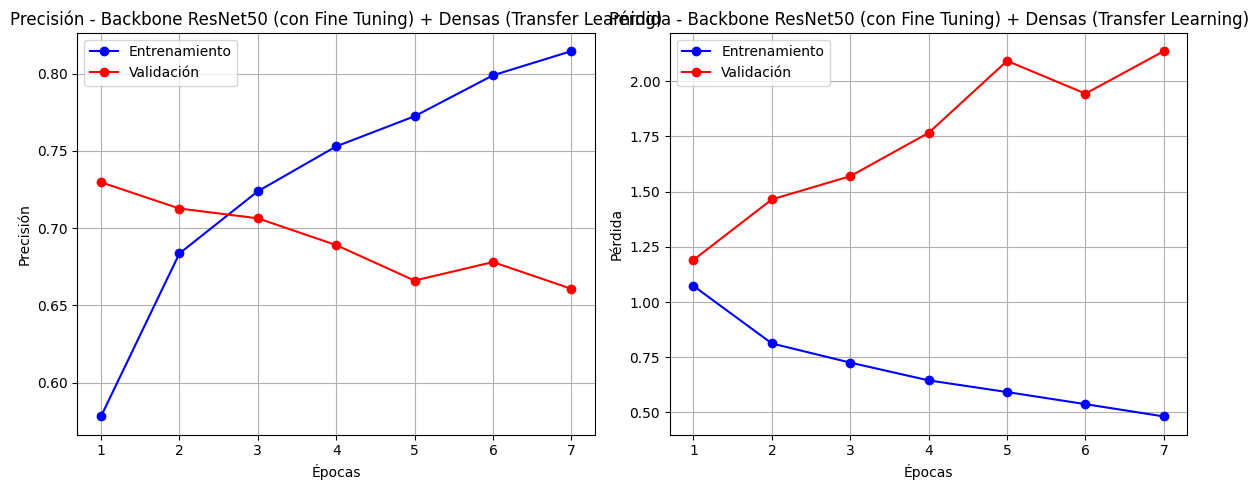

In [6]:
# Descongelamos las últimas capas del backbone
base_model.trainable = True
fine_tune_at = 140  # capa desde la cual entrenar (ajustable)
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compilamos nuevamente con LR más bajo
optimizer_fine = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(
    optimizer=optimizer_fine,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_fine = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=6, restore_best_weights=True
    )
]

history_fine = model.fit(
    train_ds,
    validation_data=val_ds1,
    epochs=20,
    callbacks=callbacks_fine,
    verbose=1
)

plot_training_history("Backbone ResNet50 (con Fine Tuning) + Densas (Transfer Learning)", history_fine)

94/94 [==============================] - 79s 814ms/step


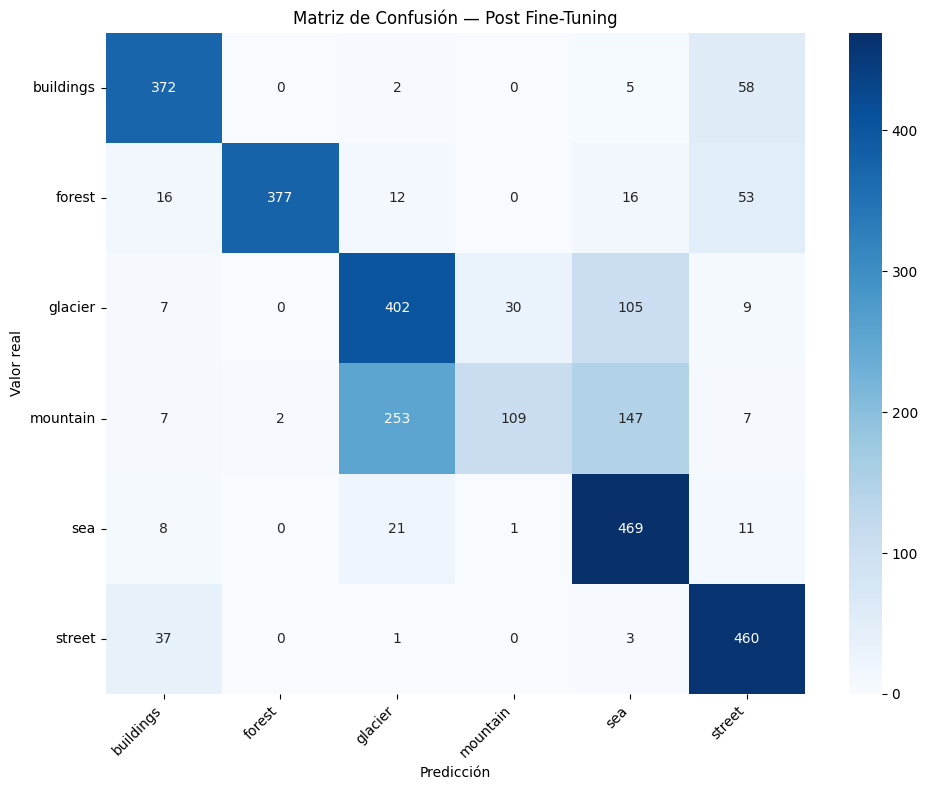

In [ ]:
# Inicializamos listas para guardar los valores en orden
y_true_list = []
x_val_list = []

# Iteramos sobre el conjunto de validación para capturar x (imagen) y y (etiqueta)
for x_batch, y_batch in val_ds1:
    x_val_list.append(x_batch)
    y_true_list.append(y_batch)

# Concatenar todos los batches a nivel de numpy
X_val_ordered = np.concatenate(x_val_list, axis=0)
y_true_one_hot = np.concatenate(y_true_list, axis=0)

# 2. Realizar las predicciones sobre el conjunto de validación ordenado
y_pred_one_hot = model.predict(X_val_ordered)

# 3. Convertir a índices de clase
y_true_classes = np.argmax(y_true_one_hot, axis=1)
y_pred_classes = np.argmax(y_pred_one_hot, axis=1)

# 4. Calcular la matriz de confusión
cm_fine_tuned = confusion_matrix(y_true_classes, y_pred_classes)

etiquetas_fine = CLASSES

fig, axes = plt.subplots(1, 1, figsize=(10, 8))

sns.heatmap(cm_fine_tuned, annot=True, fmt="d", cmap="Blues", ax=axes,
            xticklabels=etiquetas_fine, yticklabels=etiquetas_fine)
axes.set_title("Matriz de Confusión — Post Fine-Tuning")
axes.set_xlabel("Predicción")
axes.set_ylabel("Valor real")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis de Transfer Learning (ResNet50)

 Al comparar los resultados de ResNet50 con nuestro modelo de referencia (Conv + Capas densas), observamos un comportamiento complejo en el Transfer Learning, con una fase inicial muy exitosa y un fallo en el ajuste fino.

---

## Rendimiento con ResNet50 Inicial

Al acoplar un nuevo head (capas densas de clasificación) a la ResNet50 congelada, las métricas iniciales fueron sorprendentemente altas:

- ResNet50 (Backbone Congelado): Pérdida en test: $0.2382$ - Exactitud en test: $0.9127$
- CNN Custom (Referencia): Pérdida en test: $0.3360$ - Exactitud en test: $0.8767$

Este desempeño resultó significativamente mejor que el logrado por nuestro modelo CNN diseñado desde cero (una mejora de $\approx 3.6\%$ en exactitud). Esto demuestra la superioridad de las características generales aprendidas por ResNet50 en el gran dataset ImageNet, incluso sin ningún entrenamiento en capas internas.

### Matriz de Confusión Inicial
La matriz de confusión inicial refleja este excelente desempeño. Los errores principales que se observan son: 
- Confusión street vs. buildings (56 errores): Es común que las calles incluyan edificios dominantes, confundiendo al clasificador.
- Confusión mountain vs. glacier (124 errores): Ambas clases comparten la topografía montañosa, y el modelo lucha por distinguir la presencia/ausencia de hielo/nieve.

---

## Intentos de Fine-Tuning y Consecuencias

Para intentar mejorar las métricas, recurrimos al **Fine-Tuning**, descongelamos y reentrenamos una parte de las capas convolucionales del *backbone* de ResNet50, además del nuevo *head*.

Probamos a realizar el *fine-tuning* a partir de la **capa 140**. Esta técnica empeoró el modelo, reduciendo el accuracy de 91.27% a 72.97% en el conjunto de validación. A demás esto introdujo rápidamente el problema de *overfitting*. La complejidad y el gran número de parámetros de ResNet50 hicieron que, al ser entrenadas, estas capas tuvieran una fuerte tendencia a **memorizar los datos de entrenamiento**.

### Matriz de Confusión Post Fine-Tuning
La Matriz de Confusión Post Fine-Tuning es la evidencia más clara de que la técnica introdujo un problema de sobreajuste (overfitting) y pérdida catastrófica de características:
- **Pérdida de Generalización:** La exactitud cae debido a que las capas base, al ser reentrenadas, se adaptaron demasiado a las peculiaridades del set de entrenamiento, perdiendo su capacidad para generalizar.
- **Aumento de Confusiones Ilógicas:** Los errores fuera de la diagonal aumentan drásticamente. Por ejemplo, glacier (Real) es clasificado como sea (Predicción) en 105 casos, y mountain (Real) es clasificado como sea (Predicción) en 147 casos. Esto sugiere que el modelo ha aprendido a asociar grandes masas de azul (agua/hielo) con la clase sea de manera incorrecta. 



**Conclusión:** Aunque el fine-tuning se esperaba que elevara la precisión, la inestabilidad y el overfitting resultante, sumado a la significativa complejidad y el mayor tiempo de entrenamiento que conlleva un modelo como ResNet50, nos llevó a descartar este mismo como la solución óptima. El modelo simple de Transfer Learning con Backbone congelado ($0.9127$) demostró ser mucho más robusto y obtuvo las mejores métricas. Sin embargo, dado que utiliza una arquitectura tan grande como ResNet50, su ejecución demandó un poder de cómputo significativamente alto, resultando en tiempos de entrenamiento prolongados en comparación con la CNN + Capas Densas. Por esto mismo, llegamos a la conclusión de que **el modelo óptimo es el modelo que usa CNN + Capas Densas**, ya que ofrece un excelente equilibrio entre rendimiento ($\mathbf{0.8767}$ de exactitud) y eficiencia computacional. 

# Probamos Modelo Convolucional + Densas con Data Augmentation

In [ ]:
# Parámetros
img_size = (150, 150)
batch_size = 32

# === Carga de datos ===
# Estas variables del dataset no tienen normalización por defecto
train_ds = tf.keras.utils.image_dataset_from_directory(
    "seg_train/seg_train",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "seg_test/seg_test",
    image_size=img_size,
    batch_size=batch_size,
    label_mode="categorical"
)


Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


Epoch 1/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 22s 42ms/step - accuracy: 0.3655 - loss: 1.4991 - val_accuracy: 0.4987 - val_loss: 1.2889
Epoch 2/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.5043 - loss: 1.2140 - val_accuracy: 0.5450 - val_loss: 1.1914
Epoch 3/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.5599 - loss: 1.1304 - val_accuracy: 0.6157 - val_loss: 1.0396
Epoch 4/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.5771 - loss: 1.0886 - val_accuracy: 0.5717 - val_loss: 1.0938
Epoch 5/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.5972 - loss: 1.0564 - val_accuracy: 0.6157 - val_loss: 1.0296
Epoch 6/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.6122 - loss: 1.0130 - val_accuracy: 0.6850 - val_loss: 0.8529
Epoch 7/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.6375 - loss: 0.9720 - val_accuracy: 0.6753 - val_loss: 0.8872
Epoch 8/50
439/439 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.6507 - loss: 0.9457 - 

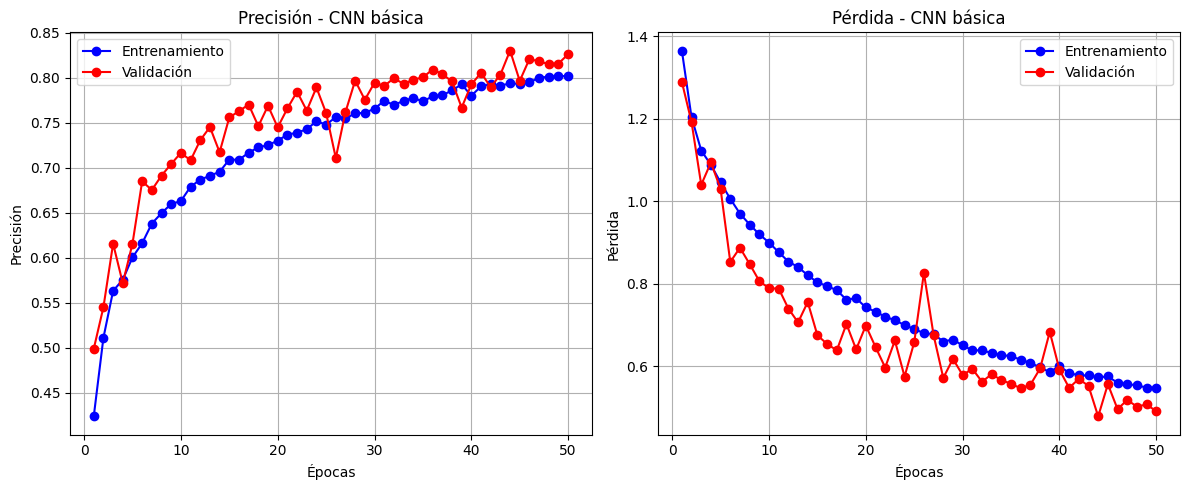

In [ ]:
model = models.Sequential([
    # Capa de Normalización
    layers.Rescaling(1./255, input_shape=img_size + (3,)),

    # Capas de Data Augmentation
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.2),

    # Bloque convolucional 1
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Bloque convolucional 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    # Bloque convolucional 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),

    # Aplanar y densas
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(6, activation="softmax")
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks_list,
    verbose=1
)
loss, acc = model.evaluate(val_ds)
print(f"Pérdida en test: {loss:.4f} - Exactitud en test: {acc:.4f}")

plot_training_history("CNN con Data Augmentation", history)


## Estrategia de Data Augmentation y su Impacto 🖼️
A diferencia del modelo base, esta arquitectura incorporó una estrategia de **Data Augmentation** para generar nuevas variaciones de las imágenes de entrenamiento. La meta era enriquecer el dataset, haciendo que el modelo fuera más robusto y generalizara mejor. Sin embargo, los resultados mostraron un comportamiento inesperado.

1. **Aumento del Coste Computacional:** Como se esperaba, la inclusión de las capas de Data Augmentation (rotación, zoom y contraste) incrementó el tiempo de entrenamiento por época. Esto se debe a la carga computacional de generar dinámicamente nuevas versiones de las imágenes. Aunque el modelo con Data Augmentation podría haber requerido menos épocas para converger si la estrategia hubiera sido exitosa, el mayor tiempo por época no compensó esta posibilidad.

2. **Rendimiento Inferior:** Contrario a lo que se suele esperar, el modelo con Data Augmentation no superó al modelo base. La exactitud final en el conjunto de validación fue ligeramente inferior, y la pérdida fue mayor. Este resultado puede deberse a que las transformaciones aplicadas fueron demasiado agresivas para este conjunto de datos en particular. Es posible que el modelo fuera incapaz de encontrar un patrón estable ante la alta variabilidad introducida, comprometiendo su rendimiento en lugar de mejorarlo.

---
## Conclusión: El Trade-off de la Complejidad ⚖️
Este experimento resalta un concepto clave en el tuning de modelos: el balance entre la complejidad de la red y la calidad del dataset. El modelo base, con una configuración más sencilla, ya demostró una excelente capacidad de generalización. La adición de Data Augmentation, en este caso, introdujo una complejidad innecesaria que no solo aumentó el tiempo de entrenamiento, sino que también diluyó la información clave que la red necesitaba para aprender, llevando a un rendimiento inferior.

Hemos concluido que, para este problema y conjunto de datos, la arquitectura original ofrece la mejor solución en términos de eficiencia computacional y precisión de predicción. El modelo base no solo es más rápido, sino que también ha demostrado ser más preciso en la práctica.